<a href="https://colab.research.google.com/github/olowu289/olowu289/blob/main/Copy_of_mask_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#clone YOLOv5 and 
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 12589, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 12589 (delta 6), reused 8 (delta 3), pack-reused 12575
Receiving objects: 100% (12589/12589), 12.26 MiB | 32.96 MiB/s, done.
Resolving deltas: 100% (8663/8663), done.
/content/yolov5
     |████████████████████████████████| 596 kB 5.1 MB/s 
     |████████████████████████████████| 750.6 MB 11 kB/s 
     |████████████████████████████████| 21.0 MB 1.3 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.13.0 requires torch==1.12.0, but you have torch 1.11.0 which is incompatible.
torchaudio 0.12.0+cu113 requires torch==1.12.0, but you have torch 1.11.0 which is incompatible.
     |████████████████████████████████| 145 kB 5.1 MB/s 
     |████████████████████████████████| 178 kB 43

In [ ]:
# let load in our dataset
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="7Vhf2bU93C3iYdBCAPVh")
project = rf.workspace("natdanai-buranapakdee").project("mask-detection-djxai")
dataset = project.version(1).download("yolov5")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached Pillow-8.4.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.1 MB)
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to mask-detection-1 in yolov5pytorch:: 100%|██████████| 2012/2012 [00:01<00:00, 1800.94it/s]


In [ ]:
!python train.py --img 416 --batch 32 --epochs 150 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/yolov5/mask-detection-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=150, batch_size=32, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-297-g72a81e7 Python-3.7.13 torch-1.11.0+cu102 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_

In [ ]:
# let try our saved model on our test dataset
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.1 --source {dataset.location}/test/images

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/yolov5/mask-detection-1/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-297-g72a81e7 Python-3.7.13 torch-1.11.0+cu102 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
image 1/100 /content/yolov5/mask-detection-1/test/images/108_jpg.rf.c8ae143e6fd95ab7d026a2ce68ced571.jpg: 416x416 1 cloth-mask, Done. (0.009s)
image 2/100 /content/yolov5/mask-detection-1/test/images/10_mirror_jpg.rf.a82a167939401621d8586a548af9111e.jpg: 416x416 3 maskeds, Done. (0.009s)
image 3/100 /content/yolov5/mask-detection-1/te

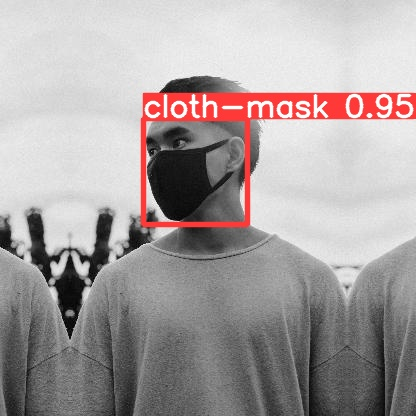

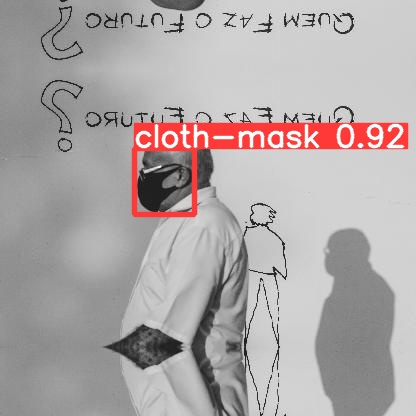

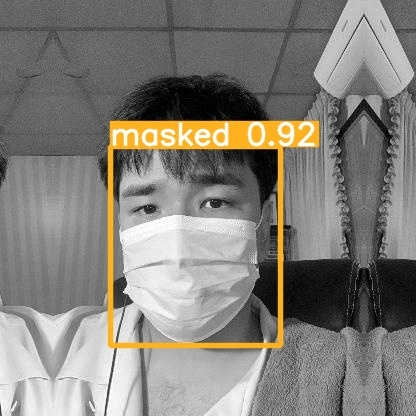

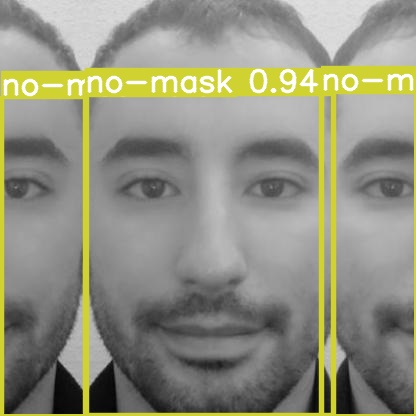

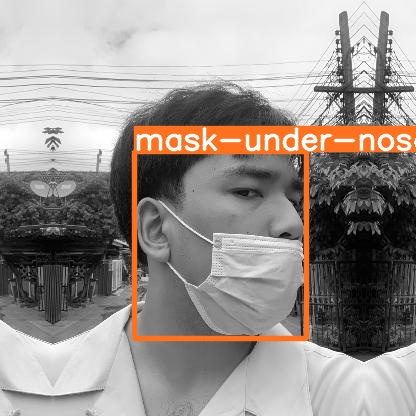

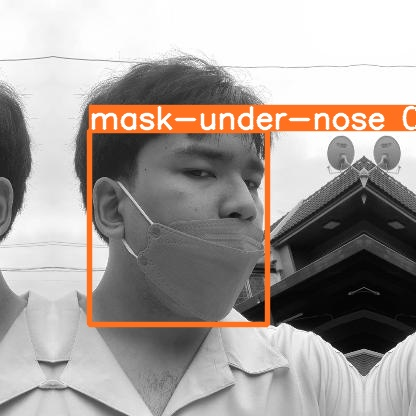

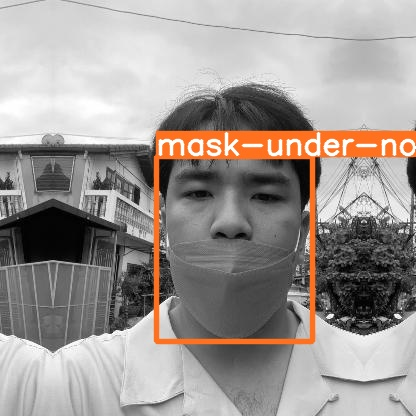

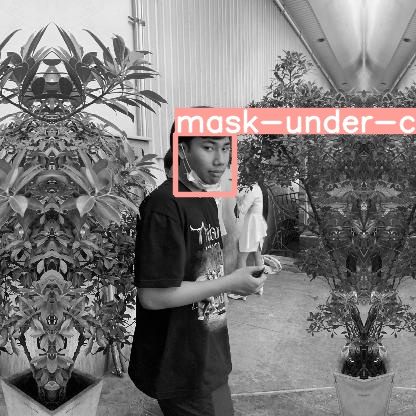

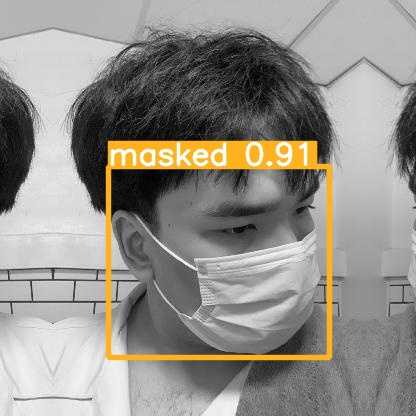

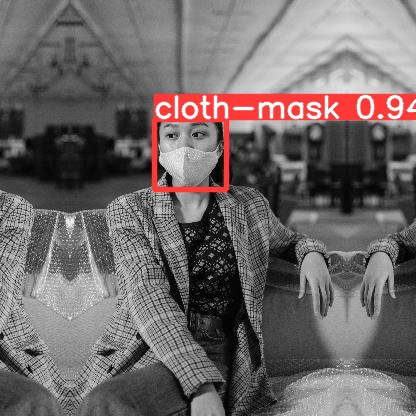

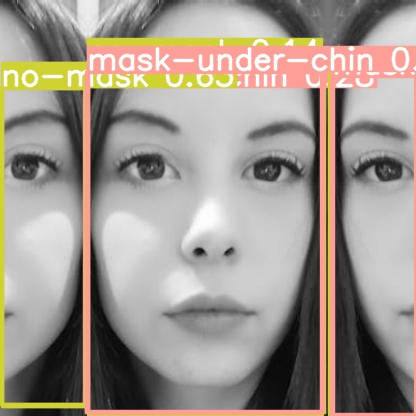

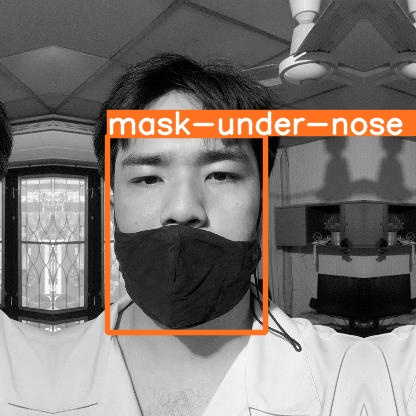

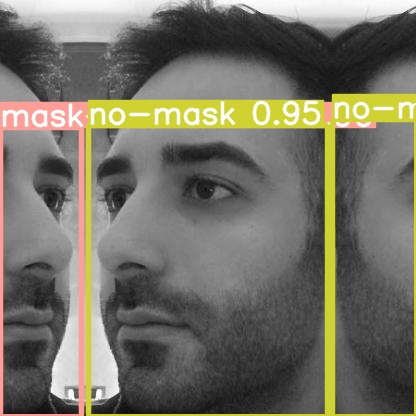

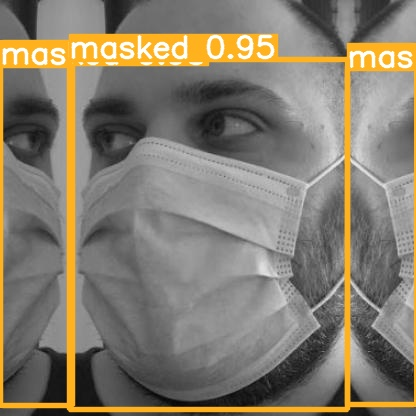

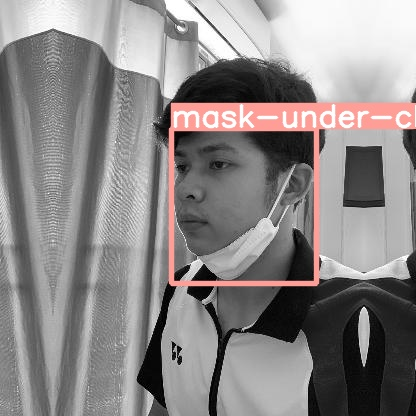

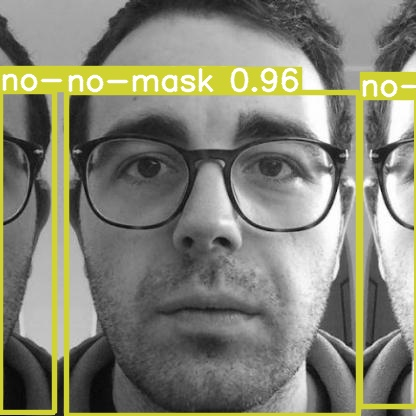

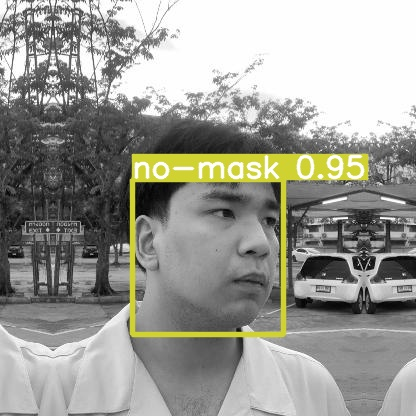

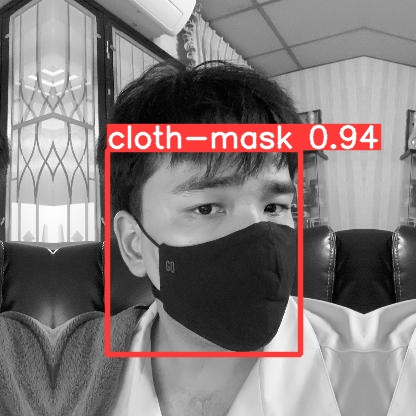

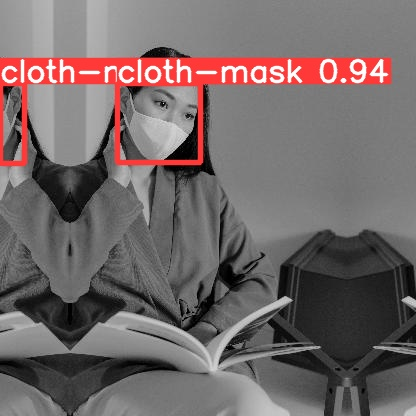

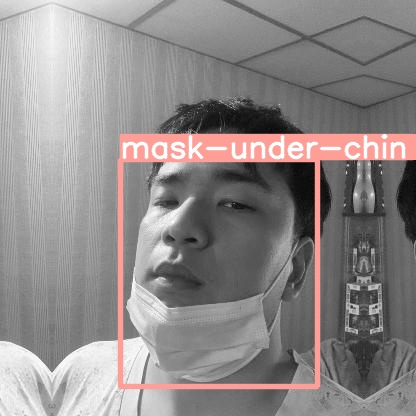

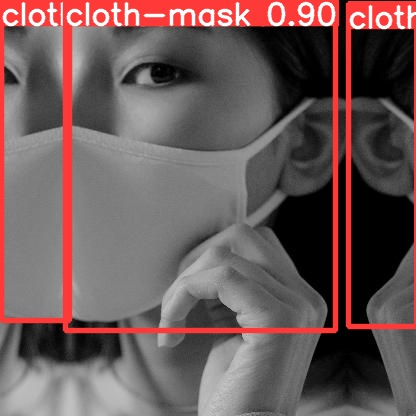

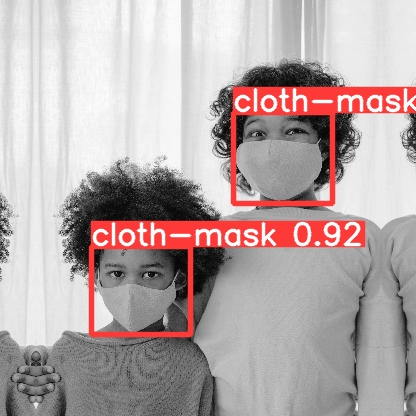

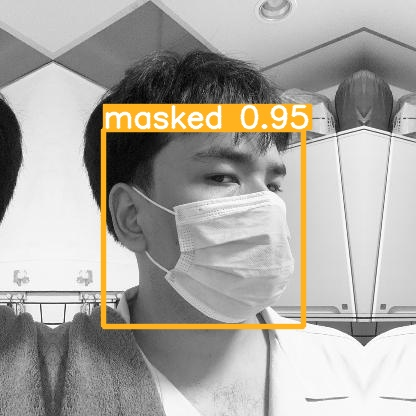

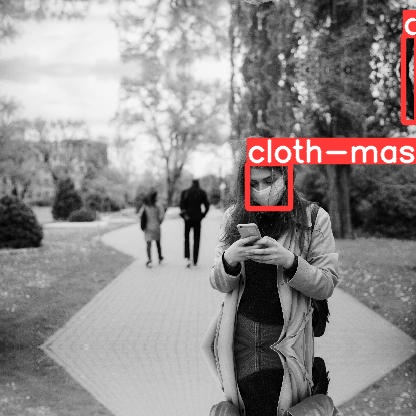

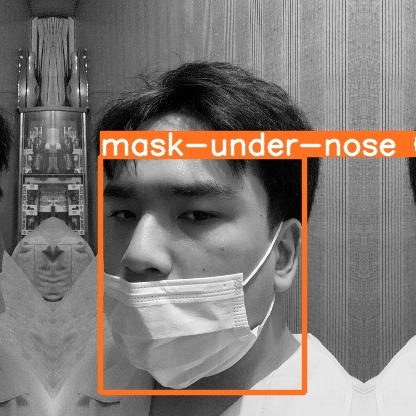

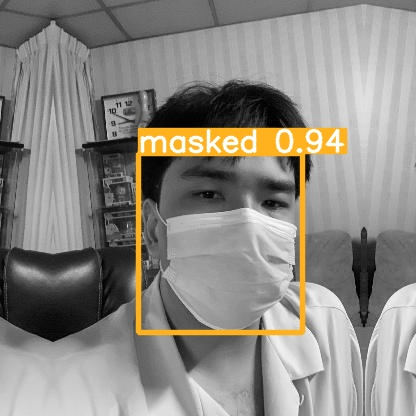

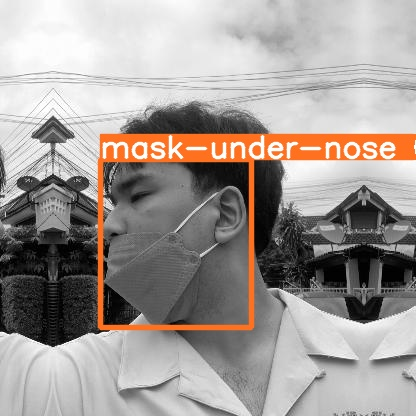

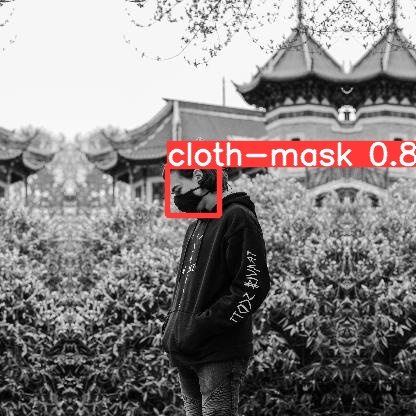

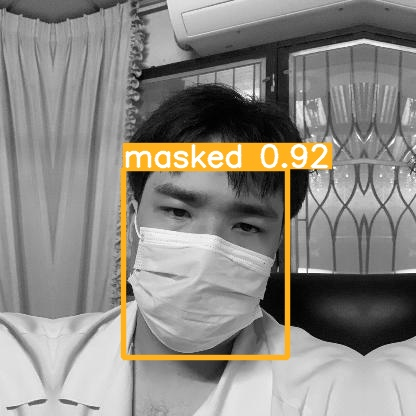

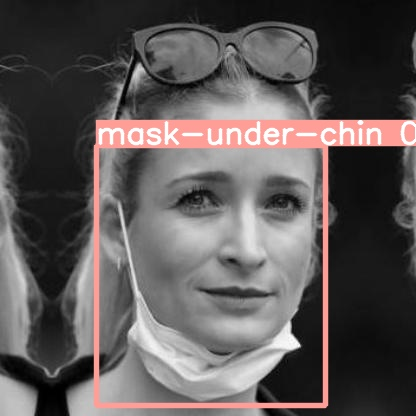

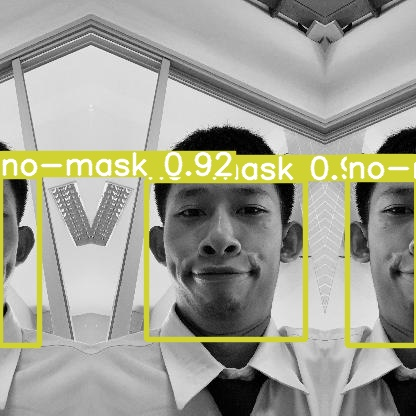

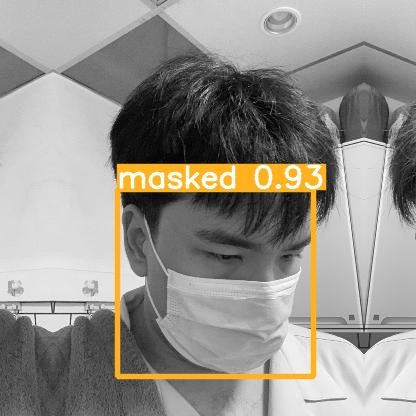

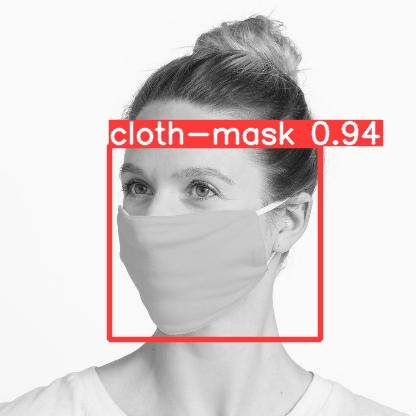

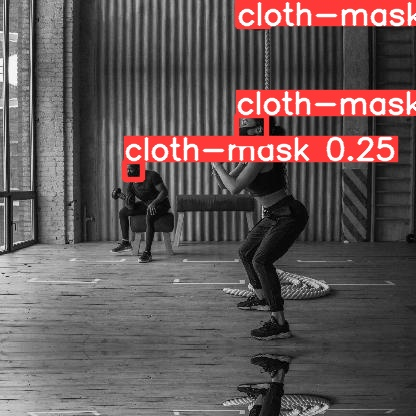

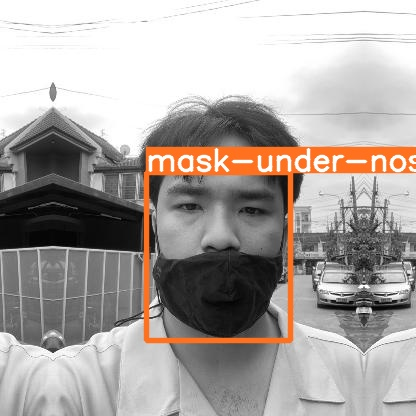

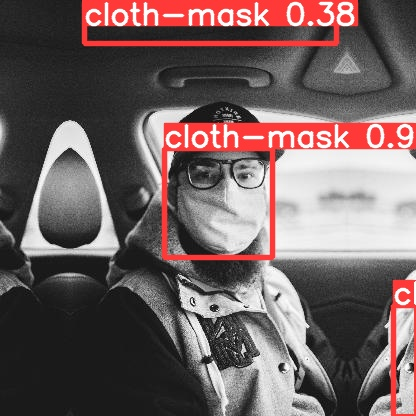

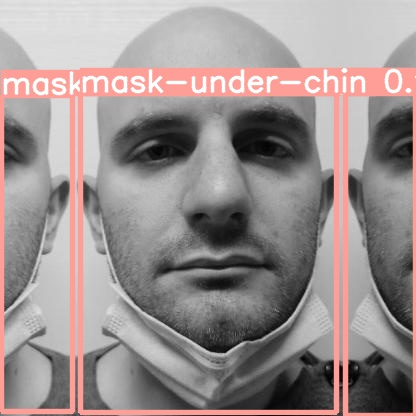

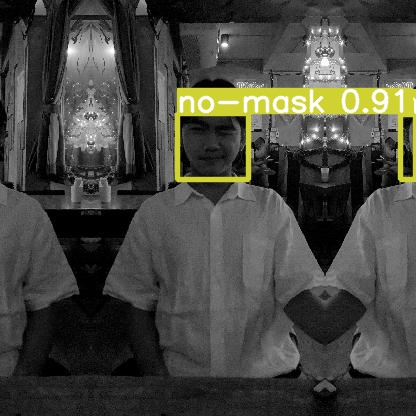

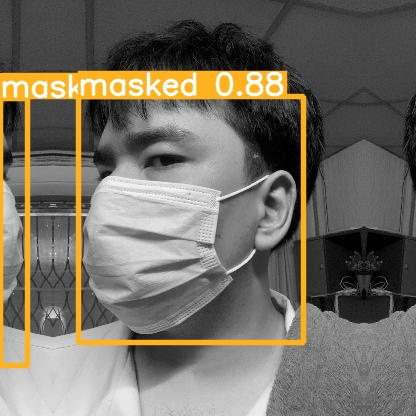

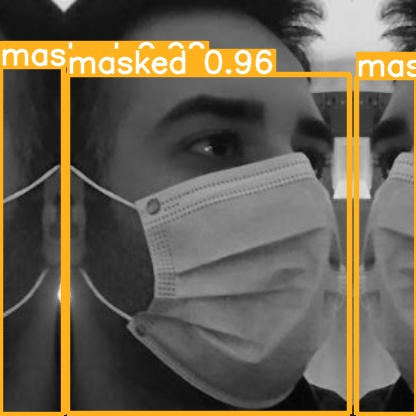

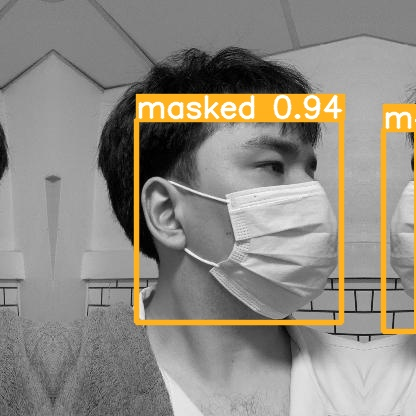

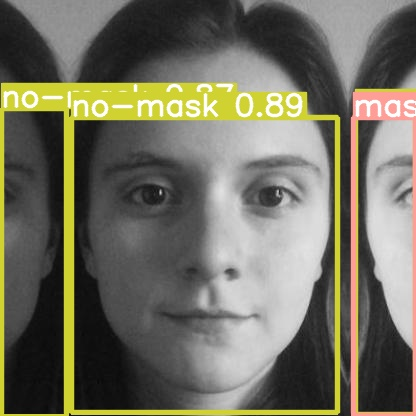

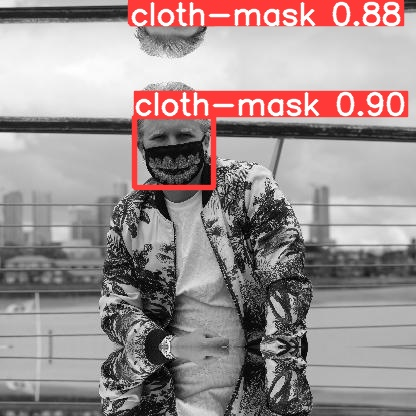

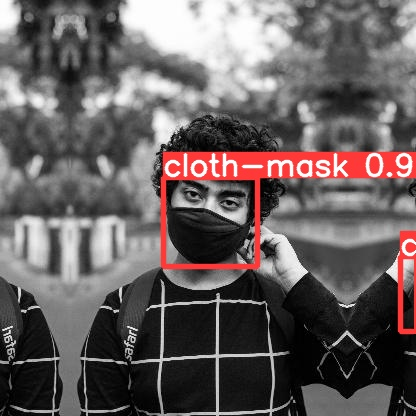

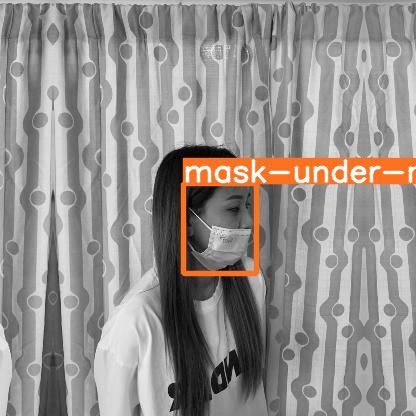

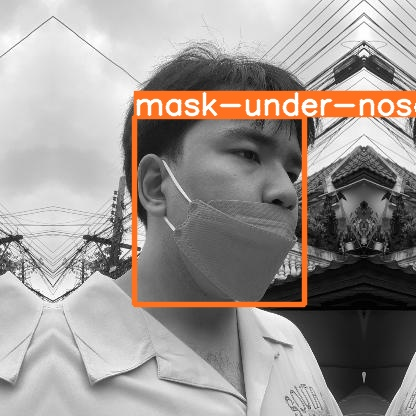

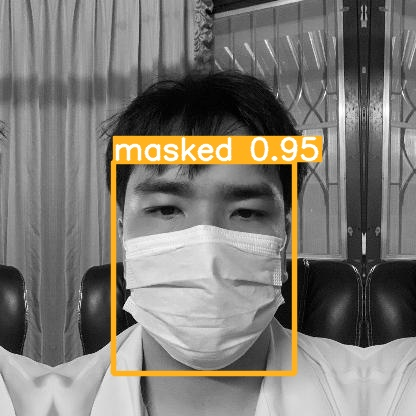

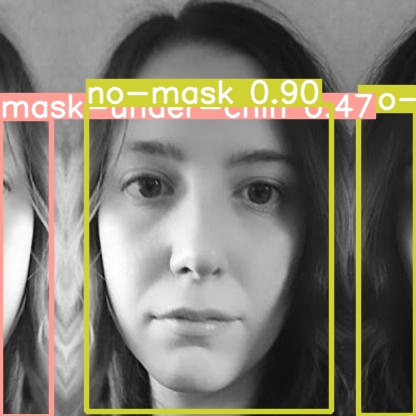

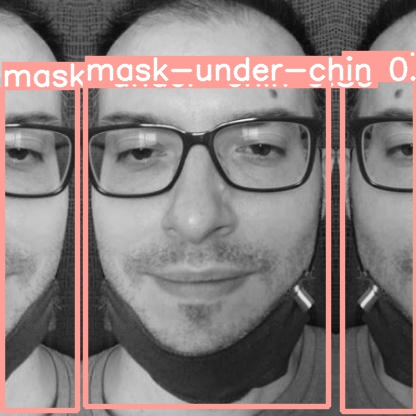

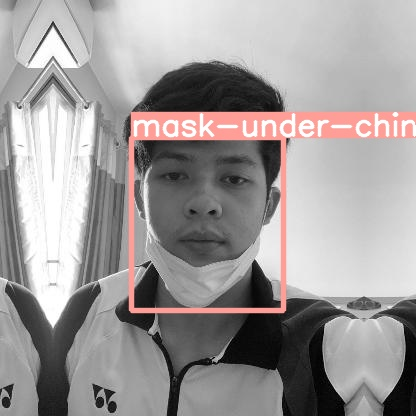

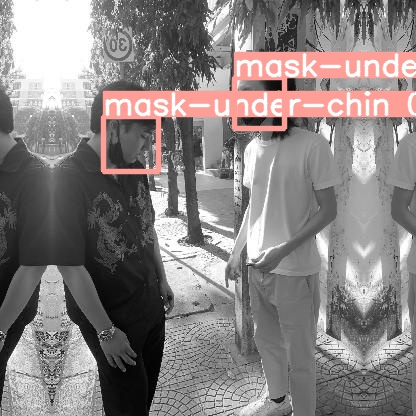

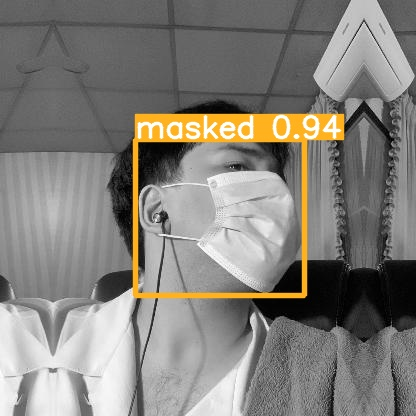

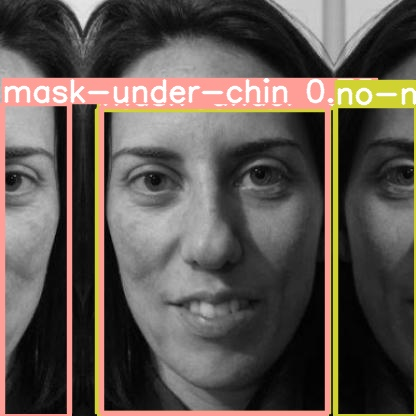

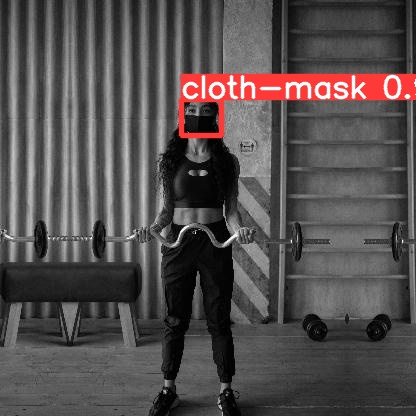

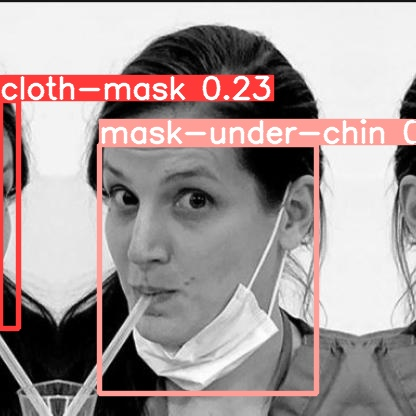

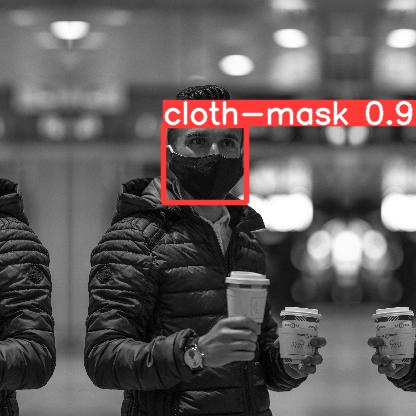

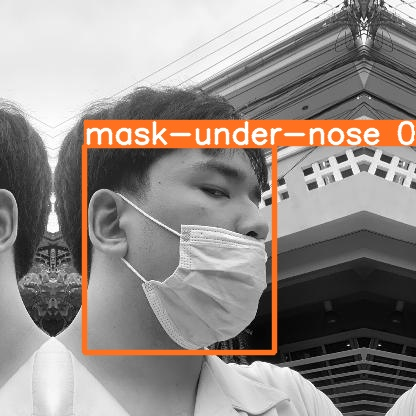

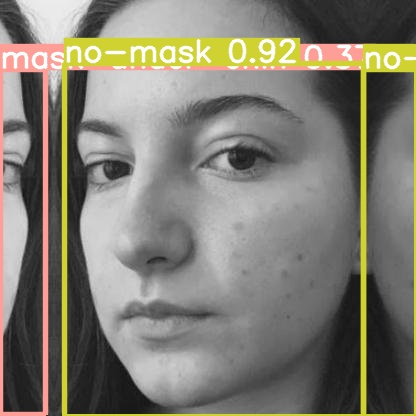

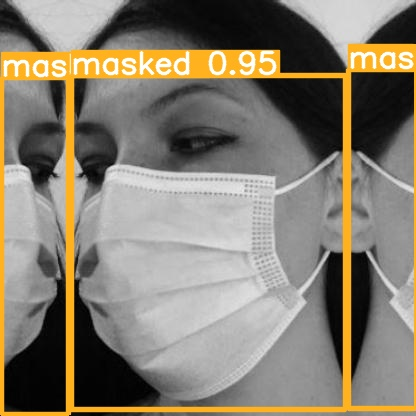

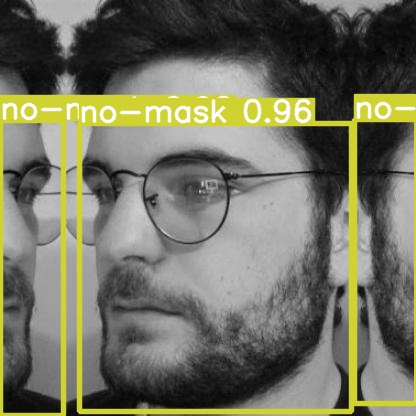

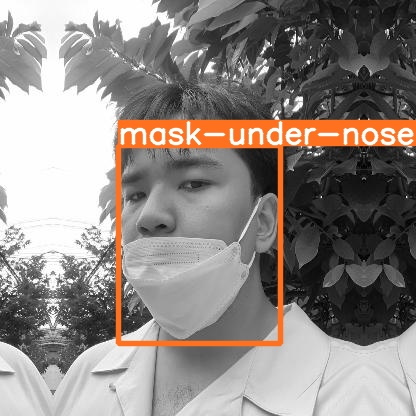

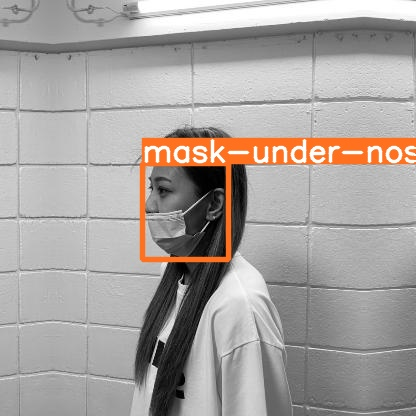

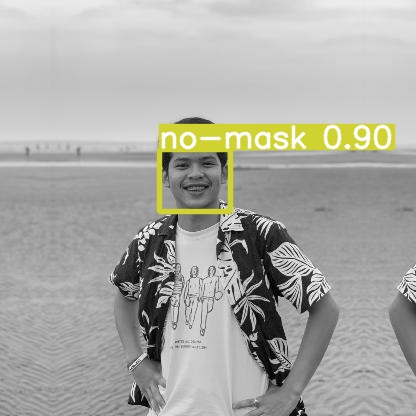

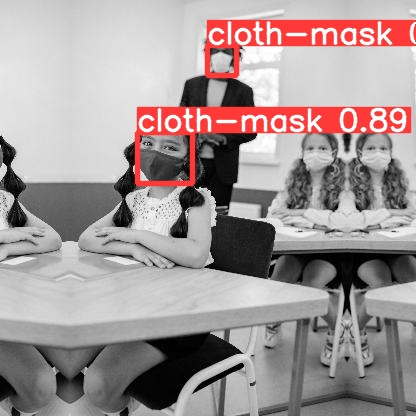

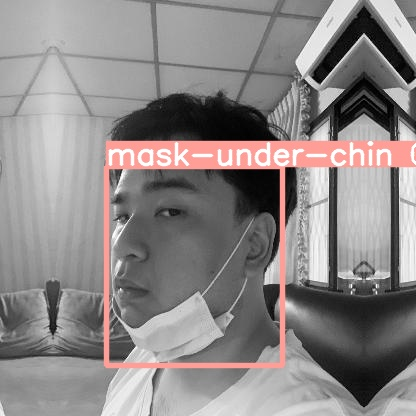

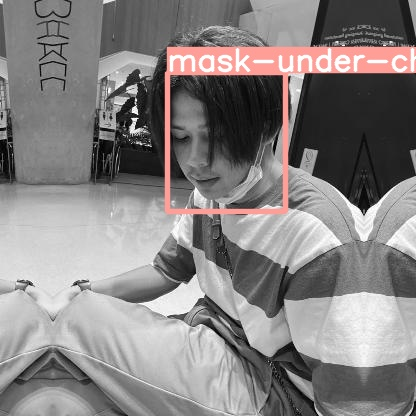

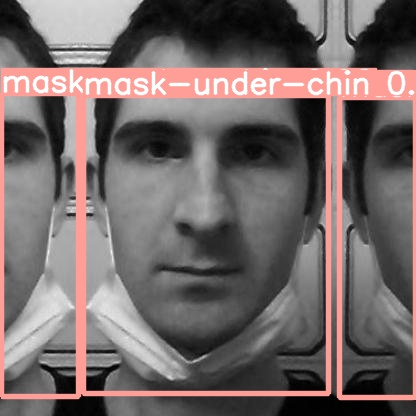

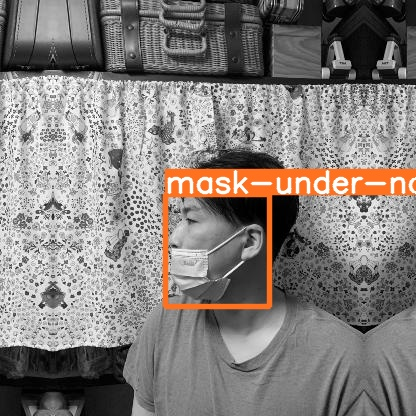

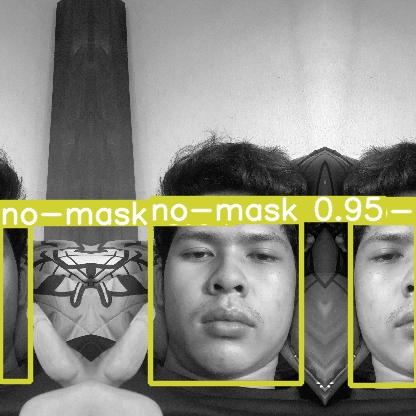

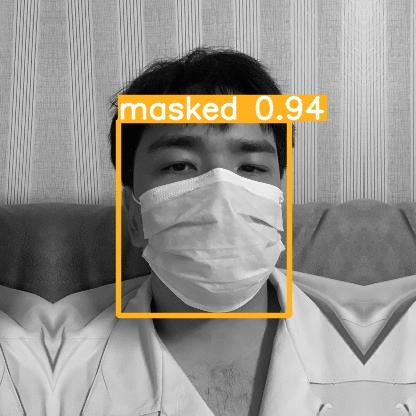

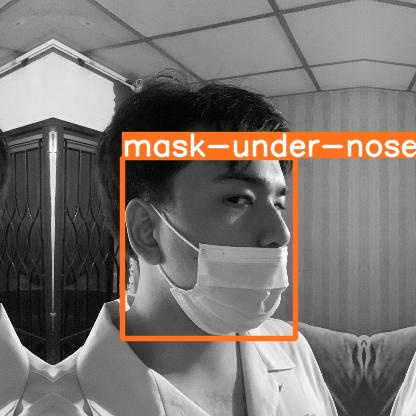

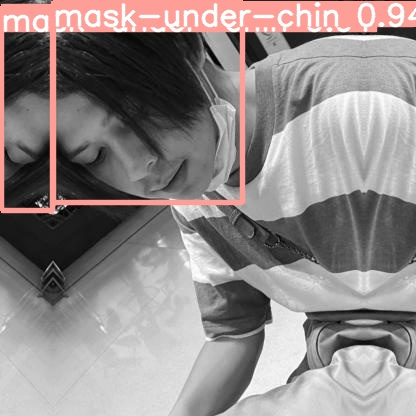

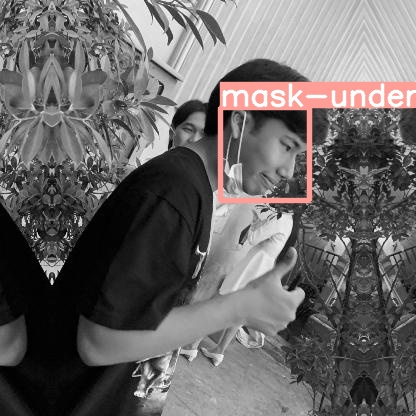

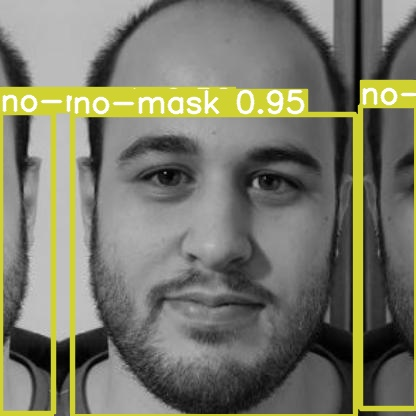

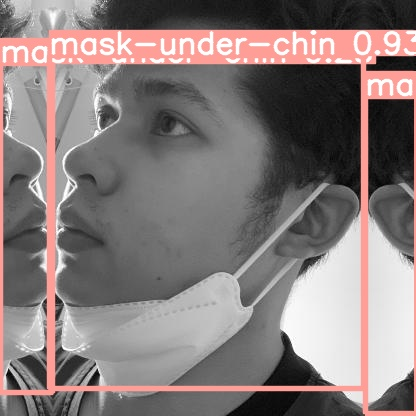

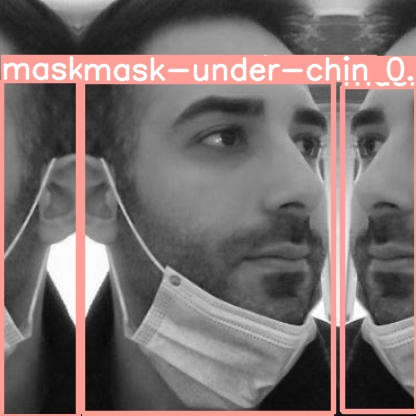

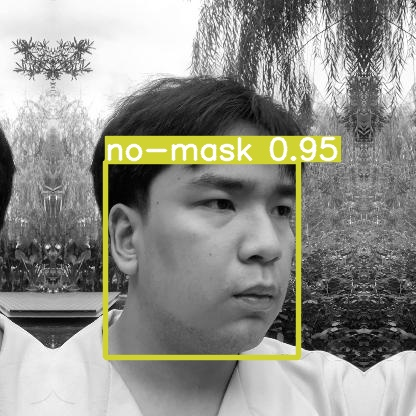

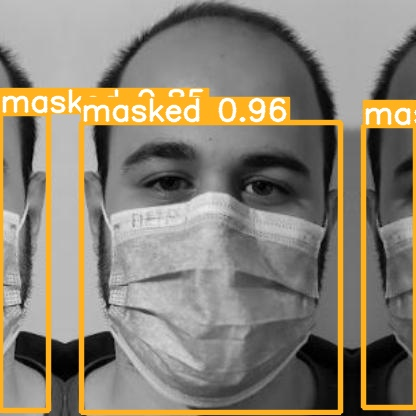

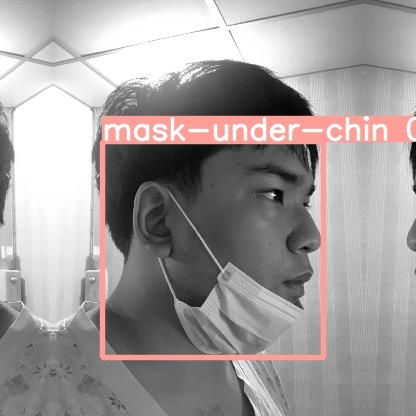

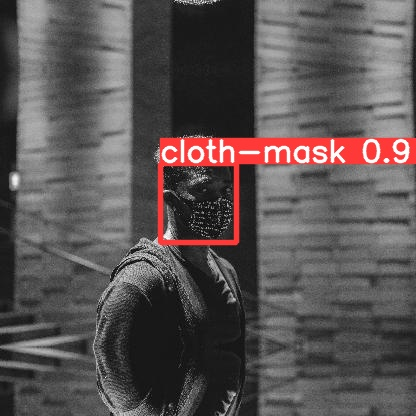

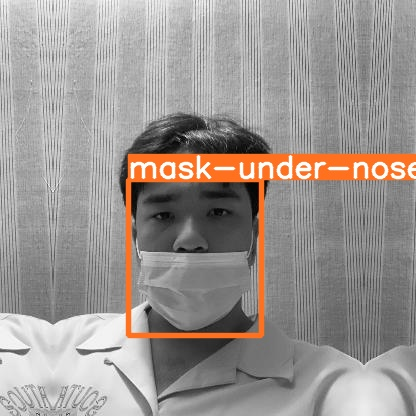

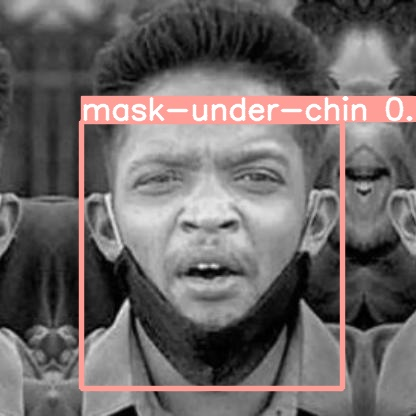

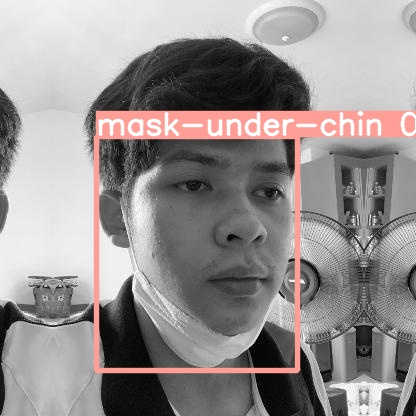

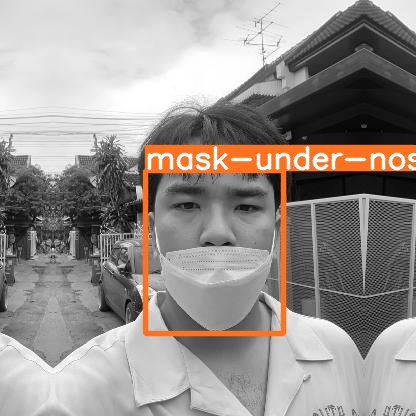

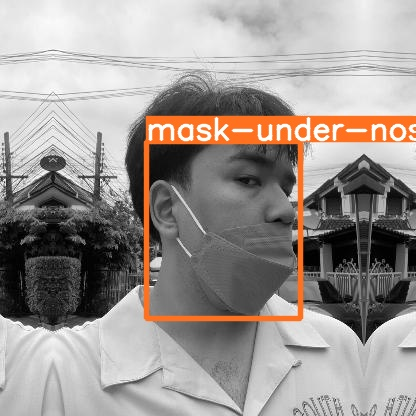

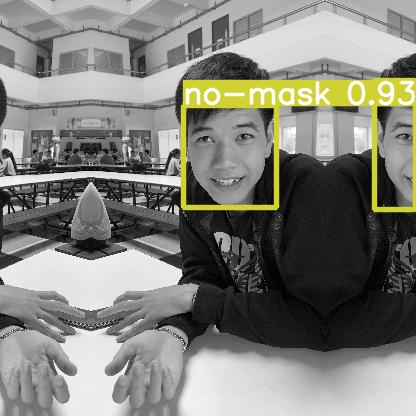

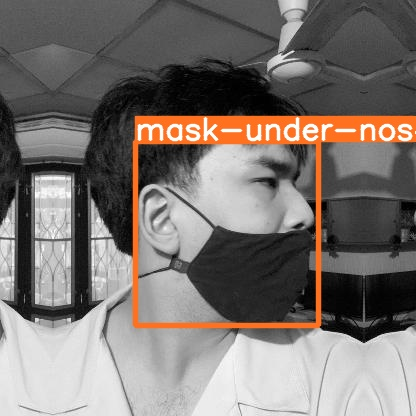

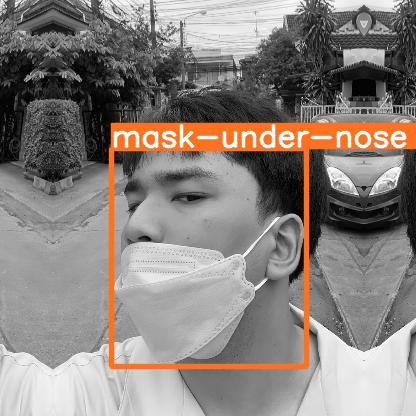

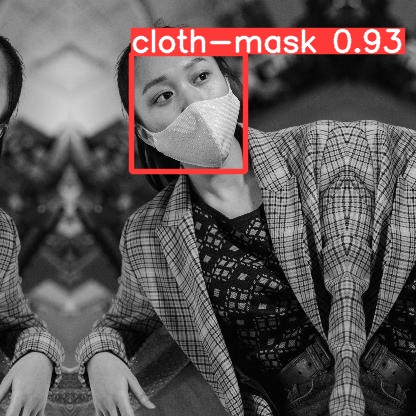

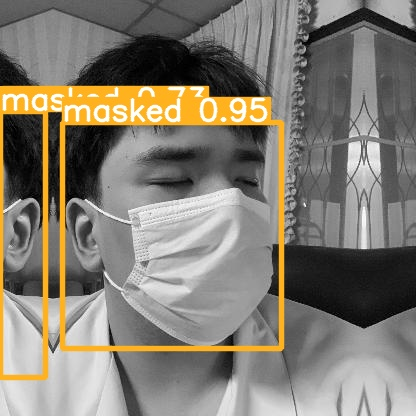

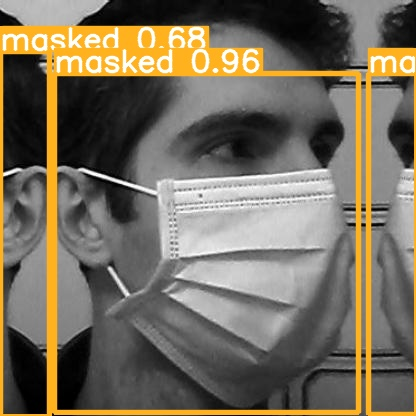

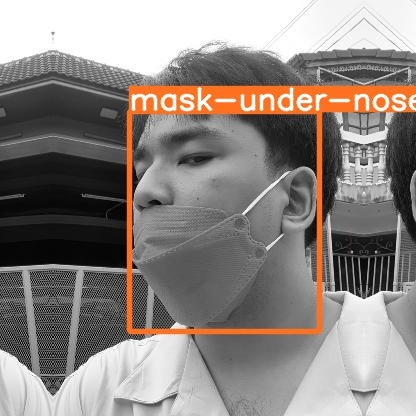

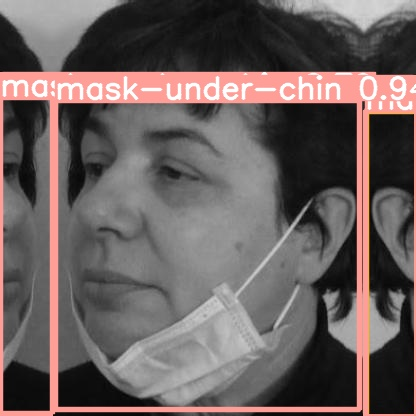

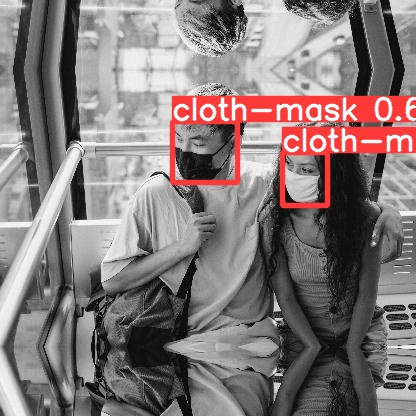

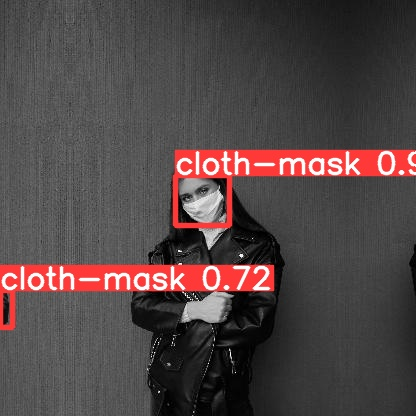

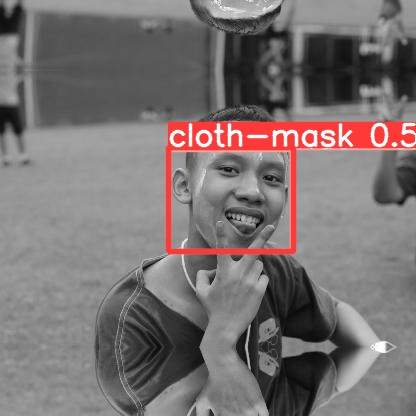

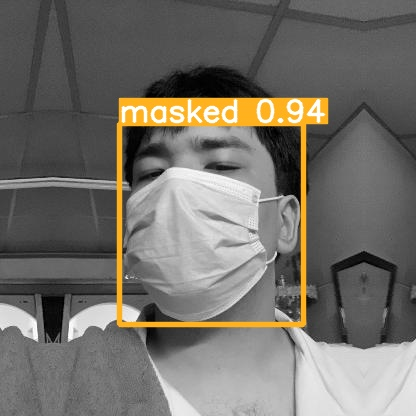

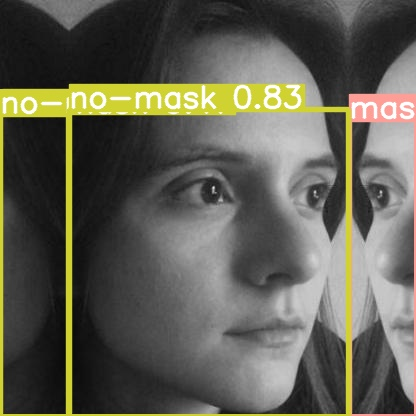

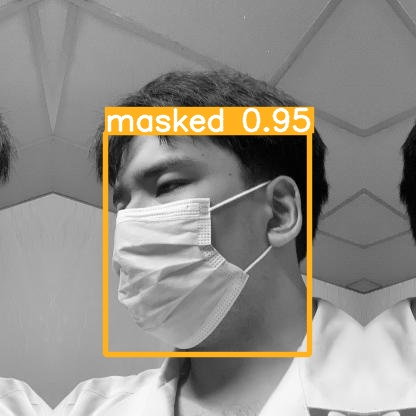

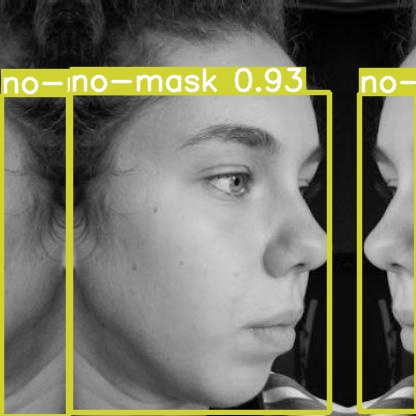

In [ ]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

In [ ]:
import cv2
import matplotlib.pyplot as plt
import torch

In [ ]:
path= 

In [ ]:
from warnings import filterwarnings
from torch import torch_version
def load_image(img_path, resize= True):
  img= cv2.imread(str(img_path))
  img=cv2.resize(img, (416, 416), interpolation= cv2.INTER_AREA)
  return img

def show_grid(image_paths):
  images= [load_image(img) for img in image_paths]
  images= torch.as_tensor(images)
  images= images.permute(0, 3, 1, 2)
  grid_img= torchversion.utils.make_grid(images, nrow=11)
  plt.figure(figsize(24, 12))
  plt.imshow(grid_img.permute(1, 2, 0))
  plt.axis("off")

In [ ]:
image_paths= glob.glob('/content/yolov5/runs/detect/exp/*.jpg')
show_grid(image_paths)

NameError: ignored